# Exploratory Data Analysis (EDA)

Exploratory data analysis is the process of reviewing and cleaning data to:
- derive insights
- generate hypothesis for experiments


In [135]:
import pandas as pd
import numpy as np

import warnings

warnings.filterwarnings('ignore')

## Loading data

In [136]:
df = pd.read_csv('../data/Auto.csv')

## Exploring

In [137]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [138]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [140]:
df.name.value_counts()

name
amc matador            5
ford pinto             5
toyota corolla         5
toyota corona          4
amc hornet             4
                      ..
buick skyhawk          1
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
chevy s-10             1
Name: count, Length: 301, dtype: int64

In [141]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

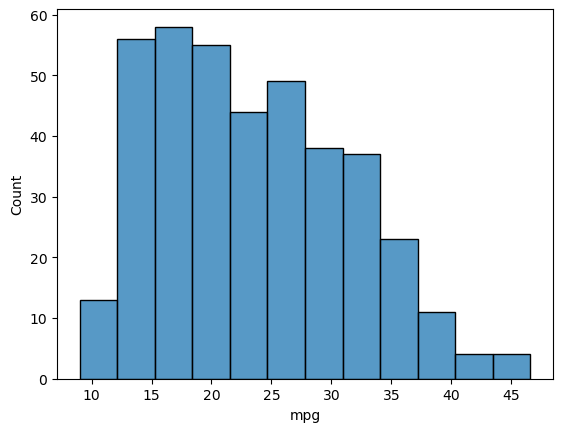

In [143]:
sns.histplot(data=df, x='mpg')
plt.show()

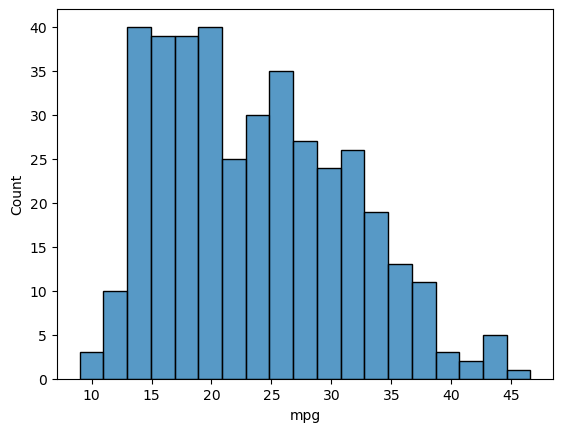

In [144]:
sns.histplot(data=df, x='mpg',binwidth=2)
plt.show()

## Data Validation

Data validation is an important early step in exploratory data analysis. It checks data types and data ranges against their expectations before we go any further.

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [146]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

What if we are not happy with the type of a column?

In [147]:
df['origin'] = df.origin.astype('category')
df['cylinders'] = df.cylinders.astype('category')

In [148]:
# df['column'] = df['column'].astype(int)

We can validate categorical data using the isin method

In [149]:
# df['categorical_column'].isin(["value_a", "value_b"])
# ~df['categorical_column'].isin(["value_a", "value_b"])

Validating numerical data

In [150]:
df.select_dtypes("number").head()

,mpg,displacement,horsepower,weight,acceleration,year
0,18.0,307.0,130,3504,12.0,70
1,15.0,350.0,165,3693,11.5,70
2,18.0,318.0,150,3436,11.0,70
3,16.0,304.0,150,3433,12.0,70
4,17.0,302.0,140,3449,10.5,70


In [151]:
df.mpg.min()

np.float64(9.0)

In [152]:
df.mpg.max()

np.float64(46.6)

<Axes: xlabel='mpg'>

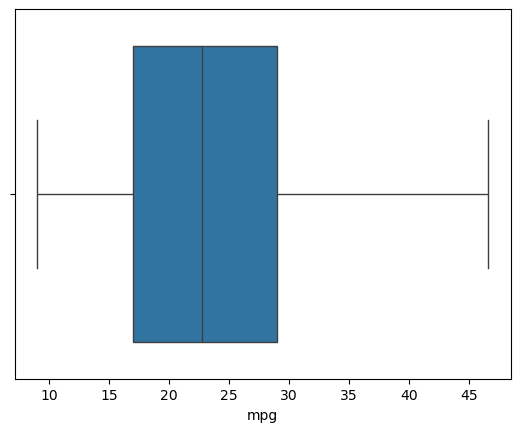

In [153]:
sns.boxplot(data=df, x='mpg')

<Axes: xlabel='mpg', ylabel='origin'>

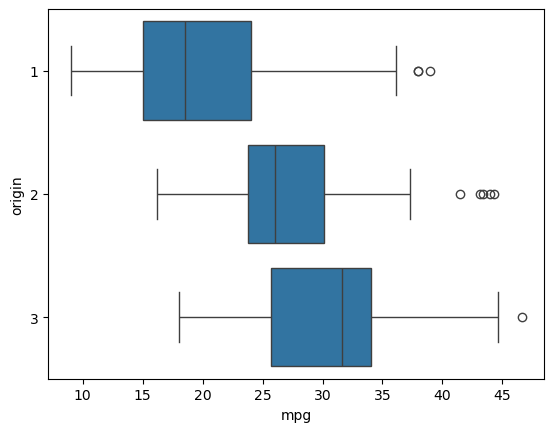

In [154]:
sns.boxplot(data=df, x='mpg', y='origin')

<Axes: xlabel='mpg'>

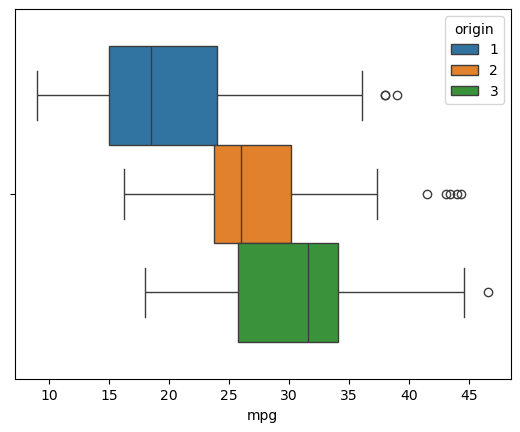

In [155]:
sns.boxplot(data=df, x='mpg', hue='origin')

# Data Summarization

Grouping data helps understanding the characteristics of groups of data.
Aggregating function indicates how to summarize the grouped data (count, mean, sum, min, max, var, std)

## Numerical

In [156]:
df.groupby('origin')['mpg'].mean()

origin
1    20.033469
2    27.602941
3    30.450633
Name: mpg, dtype: float64

In [157]:
df[['origin', 'mpg']].groupby('origin').agg(['count', 'mean'])

mpg           
       count       mean
origin                 
1        245  20.033469
2         68  27.602941
3         79  30.450633

In [158]:
df.groupby('origin').agg({'mpg':['max', 'min'],'weight':['max', 'min']})

mpg       weight      
         max   min    max   min
origin                         
1       39.0   9.0   5140  1800
2       44.3  16.2   3820  1825
3       46.6  18.0   2930  1613

In [159]:
df.groupby('origin').agg(min_mpg=('mpg', 'min'), max_weight=('weight', 'max'))

,min_mpg,max_weight
origin,,
1,9.0,5140
2,16.2,3820
3,18.0,2930


### Categorical

In [ ]:
sns.barplot(data=df, x='origin', hue='cylinders')

<Axes: xlabel='origin'>

## Addressing Missing Data

Missing data can affect distributions. Data can be then underrepresentative of the whole population, leading to wrong conclusions.

In [69]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

When facing missing data there are several options:
- drop missing values (if the total is < 5% of the total values)
- imputation of the mean, median or mode depending on the context
- imputation by subgroup


In [73]:
# Example on how to proceed with missing values:

threshold = len(df)*0.05

# Drop those under the threshold
cols_to_drop = df.columns[df.isna().sum() <= threshold]
df.dropna(subset=cols_to_drop, inplace=True)

# For the ones over the threshold, impute mode, mean...
cols_with_missing_values = df.columns[df.isna().sum() > threshold]

for col in cols_with_missing_values:
    df[col].fillna(df[col].mode()[0])

# Imputing by subgroup
df_dict = df.groupby("grouping_col").['target_col'].median().to_dict()
df['target_col'] = df['target_col'].fillna(df['grouping_col'].map(df_dict))


In [74]:
## Converting and analyzing categorical data

In [75]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [79]:
df['brand'] = df.name.str.split().str[0]

In [82]:
df.brand.nunique()

37

<Axes: xlabel='brand', ylabel='Count'>

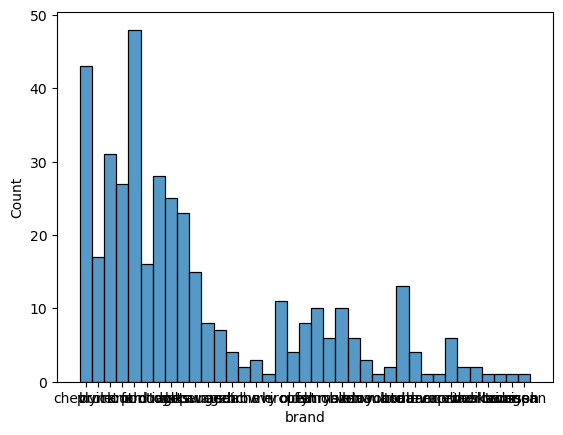

In [86]:
sns.histplot(data=df, x='brand')

In [91]:
df.brand.str.contains('^chev', case=False).sum()

np.int64(47)

In [92]:
df.brand.value_counts()

brand
ford             48
chevrolet        43
plymouth         31
dodge            28
amc              27
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
vw                6
chrysler          6
volvo             6
opel              4
saab              4
subaru            4
chevy             3
renault           3
maxda             2
cadillac          2
bmw               2
mercedes-benz     2
triumph           1
vokswagen         1
mercedes          1
hi                1
capri             1
chevroelt         1
toyouta           1
nissan            1
Name: count, dtype: int64

In [99]:
ford='ford'
chevrolet='chevrolet'
plymouth='plymouth'
dodge='dodge'
amc='amc'
toyota='toyota'
datsun='datsun'
buick='buick'
pontiac='pontiac'
volkswagen='volkswagen'
honda='honda'
mercury='mercury'
mazda='mazda'
oldsmobile='oldsmobile'
fiat='fiat'
peugeot='peugeot'
audi='audi'
chrysler='chrysler'
volvo='volvo'

brands=[ford, chevrolet, plymouth, dodge, amc, toyota, datsun, buick, pontiac, volkswagen, honda, mercury, mazda, oldsmobile, fiat, peugeot, audi, chrysler, volvo]

In [100]:
conditions=[
    (df.name.str.contains('^ford', case=False)),
    (df.name.str.contains('^chevrolet|chevroelt|chevy', case=False)),
    (df.name.str.contains('^plymouth', case=False)),
    (df.name.str.contains('^dodge', case=False)),
    (df.name.str.contains('^amc', case=False)),
    (df.name.str.contains('^toyota|toyouta', case=False)),
    (df.name.str.contains('^datsun', case=False)),
    (df.name.str.contains('^buick', case=False)),
    (df.name.str.contains('^pontiac', case=False)),
    (df.name.str.contains('^volkswagen|vw|vokswagen', case=False)),
    (df.name.str.contains('^honda', case=False)),
    (df.name.str.contains('^mercury', case=False)),
    (df.name.str.contains('^mazda', case=False)),
    (df.name.str.contains('^oldsmobile', case=False)),
    (df.name.str.contains('^fiat', case=False)),
    (df.name.str.contains('^peugeot', case=False)),
    (df.name.str.contains('^audi', case=False)),
    (df.name.str.contains('^chrysler', case=False)),
    (df.name.str.contains('^volvo', case=False))
]

In [101]:
df['clean_brand'] = np.select(conditions, brands, default='other')

In [102]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,brand,clean_brand
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford,ford
...,...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,ford,ford
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,vw,volkswagen
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,dodge,dodge
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,ford,ford


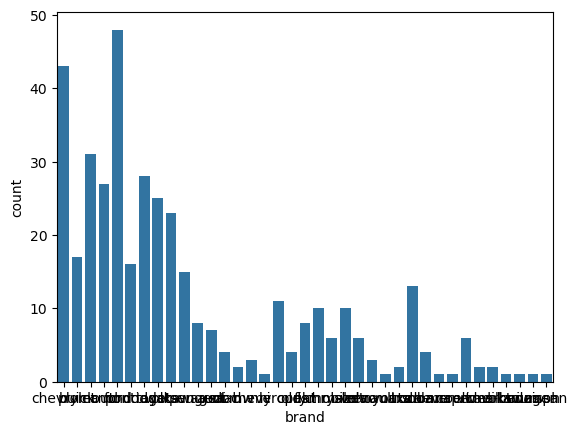

In [103]:
sns.countplot(data=df, x='brand')
plt.show()

## Working with numeric data




In [ ]:
pd.Series.str.replace('to remove', 'to replace with')

df['col'] = df['col'].astype(float)

df['std_dev']

In [105]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,brand,clean_brand
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford,ford
...,...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,ford,ford
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,vw,volkswagen
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,dodge,dodge
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,ford,ford


In [109]:
df['clean_brand_mean_std'] = df.groupby('clean_brand')['mpg'].transform(lambda x: x.std())
df['clean_brand_mean_mpg'] = df.groupby('clean_brand')['mpg'].transform(lambda x: x.mean())

In [111]:
df[['mpg', 'clean_brand', 'clean_brand_mean_mpg', 'clean_brand_mean_std']]

,mpg,clean_brand,clean_brand_mean_mpg,clean_brand_mean_std
0,18.0,chevrolet,20.219149,6.424939
1,15.0,buick,19.182353,5.760993
2,18.0,plymouth,21.703226,7.792367
3,16.0,amc,18.070370,3.225358
4,17.0,ford,19.475000,5.936383
...,...,...,...,...
387,27.0,ford,19.475000,5.936383
388,44.0,volkswagen,31.840909,7.100480
389,32.0,dodge,22.060714,7.574144
390,28.0,ford,19.475000,5.936383


## Outliers

The Interquartile Range (IQR) can help us identifying outliers.

Upper outliers are those observations bigger than the 75th percentile + 1.5 times IQR
Lower outliers are those observations smaller than the 25th percentile - 1.5 times IQR

Outliers are extreme values that may not accurately represent our data. They can change the mean and standard deviation. Statistical tests and machine learning models need normally distributed data and not skewed.

Once we know we have outliers...:
- why do they have them?
- are they accurate? or do they represent errors during the data collection phase?

In [129]:
seventyfifth_q = df['mpg'].quantile(0.75)
twentyfifth_q = df['mpg'].quantile(0.25)

iqr = seventyfifth_q - twentyfifth_q

df['outliers'] = ((df['mpg']<twentyfifth_q-1.5*iqr) | (df['mpg']>seventyfifth_q+1.5*iqr))

In [130]:
#In this example there is no outlier

df.outliers.sum()

np.int64(0)

<Axes: xlabel='mpg'>

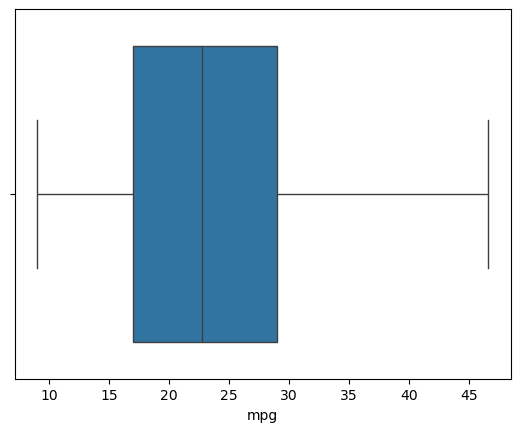

In [131]:
sns.boxplot(data=df, x='mpg')

<Axes: xlabel='mpg', ylabel='Count'>

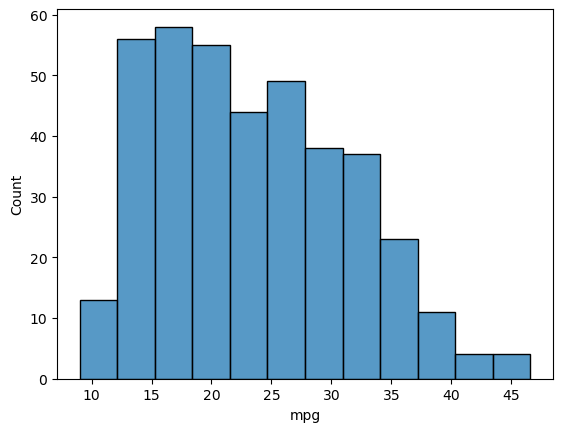

In [132]:
sns.histplot(data=df, x='mpg')

<Axes: xlabel='mpg', ylabel='Count'>

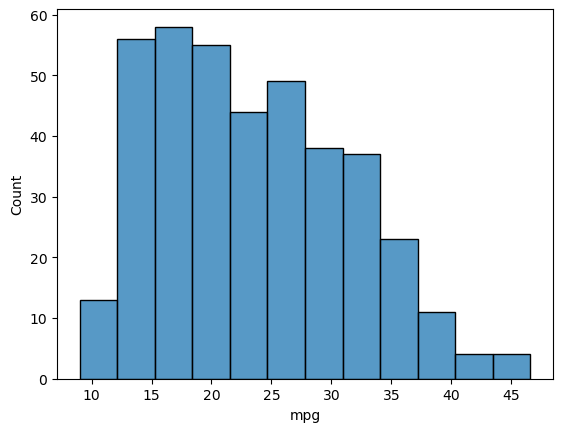

In [133]:
sns.histplot(data=df[df.outliers==False], x='mpg')

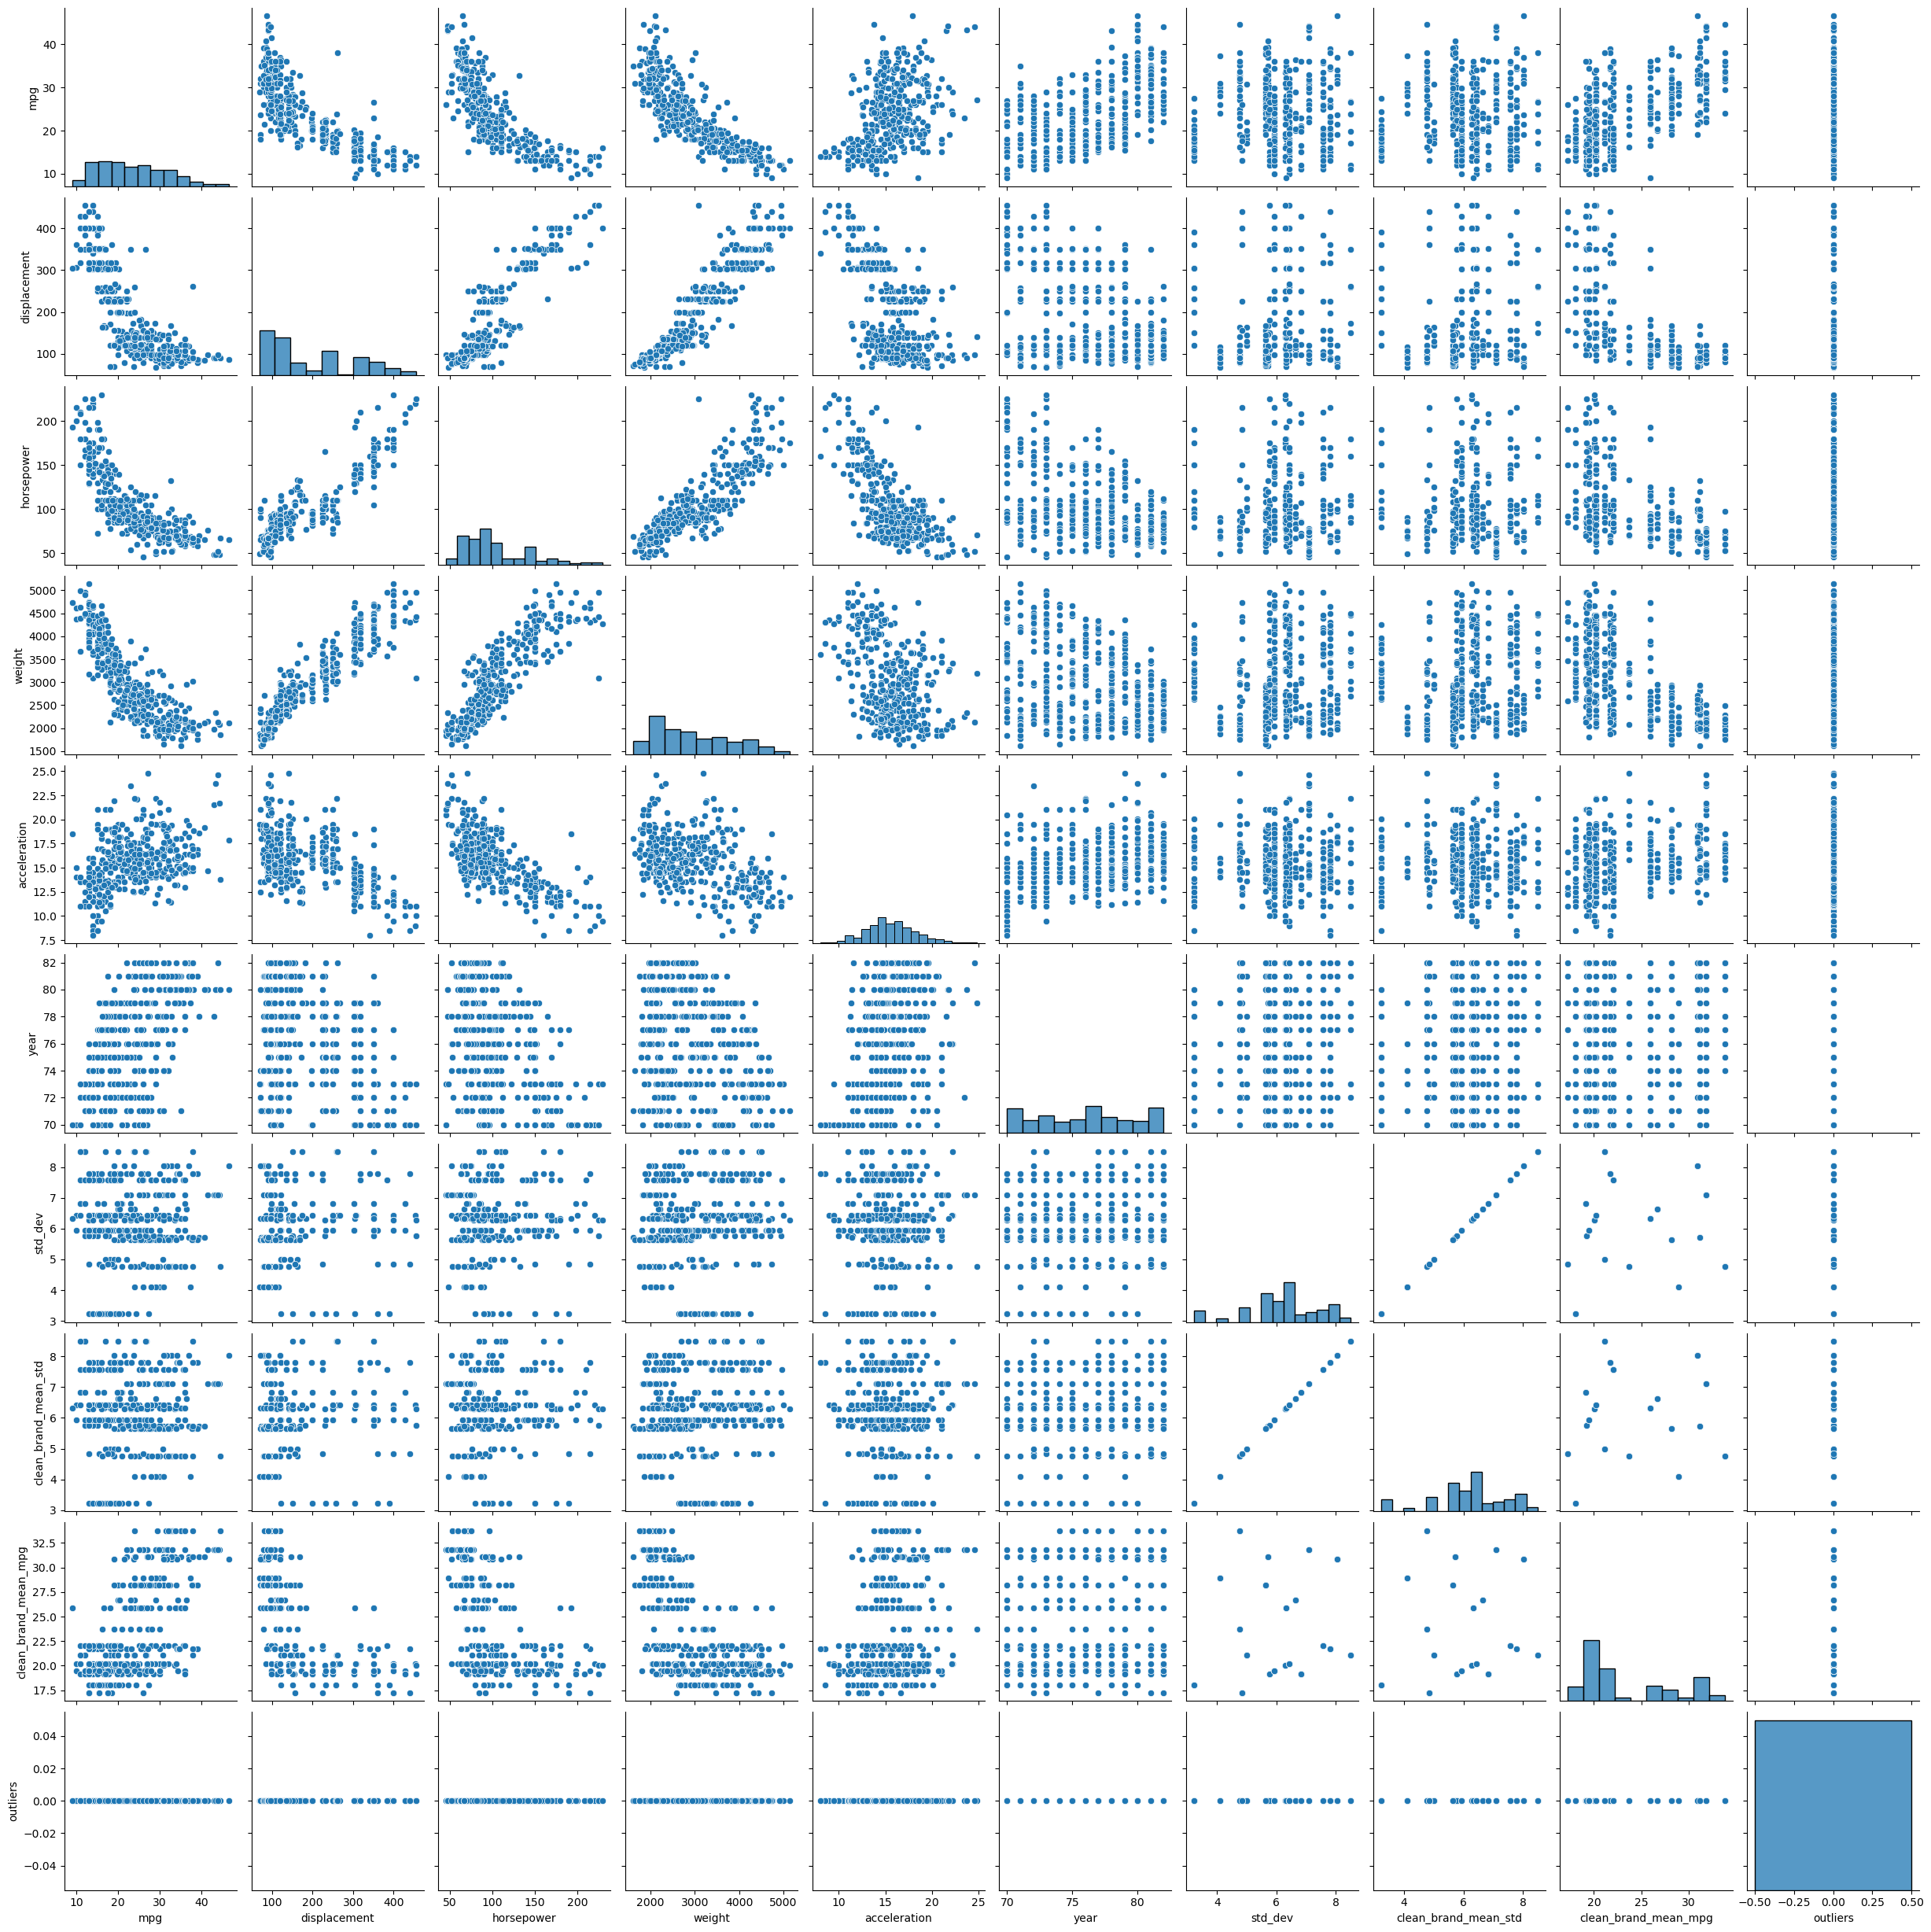

In [134]:
sns.pairplot(data=df)